In [81]:
# алгоритм для расширения стенок

import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.spatial.distance as dist


img = cv2.imread('1111.jpg')
#res = cv2.resize(img, dsize=(500, 500), interpolation=cv2.INTER_CUBIC)

In [102]:
h_x = 3
h_y = 3

iimg = np.mean(img, axis=2)
print(iimg)

l_y, l_x = np.shape(iimg)

print(l_y, l_x)

img_c = np.ones( (l_y // h_y, l_x // h_x) )
print( np.shape( img_c) )

for iy, ix in np.ndindex(img_c.shape):
    color = np.mean(iimg[iy * h_y : iy * h_y + h_y, ix * h_x : ix * h_x + h_x])
    if color < 255 * 0.9 * (1 - h_x / l_x):
        img_c[iy, ix] = 1
    else:
        img_c[iy, ix] = 0

[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]
879 1280
(293, 426)


In [90]:
h_x = 10
h_y = 10

iimg = np.mean(img, axis=2)

l_y, l_x = np.shape(iimg)

print(l_y, l_x)

for iy, ix in np.ndindex(iimg.shape):
    color = iimg[iy, ix]
    if color < 255:
        iimg[iy, ix] = 1
    else:
        iimg[iy, ix] = 0

879 1280


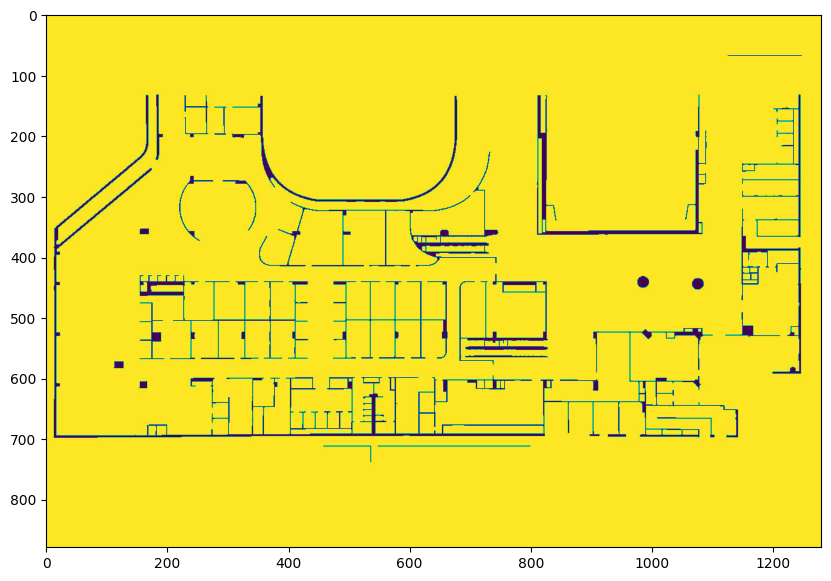

255.0


In [103]:
plt.figure(figsize=(10,8))
plt.imshow(iimg)
plt.show()

print(iimg[1,1])

In [93]:
import itertools

# найти множество элементов в двумерном массиве
def get_neighbours(arr, ind):
    l1, l2 = np.shape(arr)

    #print(l1, l2)

    # вычисляем границы

    i_min = max(0, ind[0] - 1)
    i_max = min(l1 - 1, ind[0] + 1)

    j_min = max(0, ind[1] - 1)
    j_max = min(l2 - 1, ind[1] + 1)

    # получаем множество индексов соседей

    #return np.mgrid([i_min: (i_max + 1) : 1], [j_min: (j_max + 1) : 1])

    return list ( itertools.product( range(i_min, i_max + 1, 1), range(j_min,  (j_max + 1), 1) ) )


In [104]:
N = 20

h_x = 1
h_y = 1

iimg = img_c


#print(get_neighbours(iimg, [175,5]))
count = 0
for i in range(N):

    indices = np.argwhere(iimg > 0)
    #print(indices)
    # получаем индексы стенок
    for i_y, i_x in indices:

        # получаем всех соседей
        neighb_ind = get_neighbours(iimg, [i_y, i_x])
        #print(neighb_ind)
        #print([iimg[s] for s in neighb_ind])
        # обходим всех соседей
        for k, l in neighb_ind:
            #if (k, l) in indices:
            #    continue
                # уже черную вершину не проверяем

            # флаг необходимости окраски
            to_be_black = False

            # если среди новых соседей данного соседа первоначального элемента
            # уже есть черные клетки, его не закрашиваем
            #print( k, l )

            ind = list(set(  get_neighbours(iimg, [k, l]) ).difference(set(neighb_ind) ) )
            #print(ind)
            neighb_colors = [iimg[s] for s in ind]
            #print(neighb_colors)
            if not (1 in neighb_colors):
                to_be_black = True
                #print("True!")
            if to_be_black:
                iimg[k,l] = 1
                count += 1

In [105]:
print(i_x, i_y)
print(count)

197 265
1319664


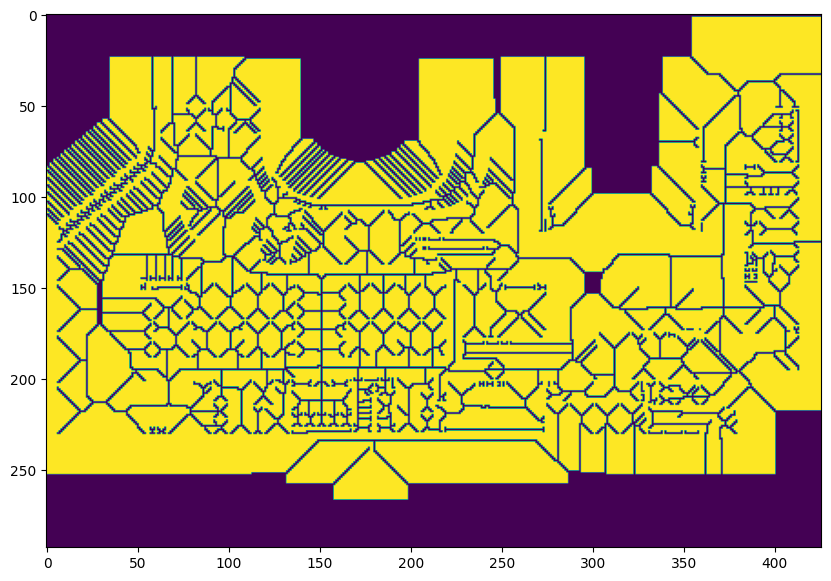

In [106]:
plt.figure(figsize=(10,8))
plt.imshow(iimg)
plt.show()

In [101]:
print(iimg[1,1])
print(iimg[780, 600])

0.0
0.0


In [ ]:
def blump(img):
    # еще один вариант функции раздутия
    # принимает на вход одноканальное изображение

    indices = np.argwhere(img > 0)
    distances = dist.pdist( np.array([img[s] for s in indices]) )
    # считаем расстояния
    a = np.min( distances[k] )
    l_y, l_x = np.shape(img)

    k = 0

    for i_y, i_x in indices:

        a = 0
        # получаем всех соседей
        neighb_ind = get_neighbours(iimg, [i_y, i_x])

        # ищем мах ребро квадрата, чтобы не он не попал на
        # вершину не из соседей




        # обходим всех соседей
        for k, l in neighb_ind:
            if (k, l) in indices:
              continue
              # уже черную вершину не проверяем

            # флаг необходимости окраски
            to_be_black = False

            # если среди новых соседей данного соседа первоначального элемента
            # уже есть черные клетки, его не закрашиваем
            #print( k, l )

            ind = list(set(  get_neighbours(iimg, [k, l]) ).difference(set(neighb_ind) ) )
            #print(ind)
            neighb_colors = [iimg[s] for s in ind]
            if not (1 in neighb_colors):
                to_be_black = True
                #print("True!")
            if to_be_black:
                iimg[k,l] = 1
                count += 1